In [19]:
import os, sys

import numpy as np
import pandas as pd
import xarray as xr
from glob import glob # useful package for opening files

import matplotlib.pyplot as plt

# This just changes the display of xarray datasets so they don't automatically
# have expanded attributes (attrs)
xr.set_options(display_expand_attrs=False)

# Can change this to False to stop xarray displaying all the data
xr.set_options(display_expand_data=False)

# Opening Data

The xarray can be used to open netcdf files as a data set or a data array.
Data sets are sets of data arrays. The below code demonstrates the differences

# Single Datset

In [4]:
glob('*.nc')

['ds1904.nc', 'ds1900.nc', 'ds1901.nc', 'ds1902.nc']

In [24]:
# Open a Data set
ds = xr.open_dataset('ds1904.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 19)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes: (5)

In [10]:
# Open a Data Array
da = xr.open_dataarray('ds1904.nc')
da

<xarray.DataArray 'air' (time: 19, lat: 25, lon: 53)>
[25175 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T18:00:00
Attributes: (11)

The difference between the two is the dataset has 'data variables'.

The data set can be converted to a data array using either of the following methods

In [20]:
ds.air

<xarray.DataArray 'air' (time: 19, lat: 25, lon: 53)>
array([[[236.5    , 236.89   , ..., 242.79999, 244.39   ],
        [241.29999, 240.89   , ..., 242.2    , 244.39   ],
        ...,
        [296.69998, 296.79   , ..., 295.79   , 295.6    ],
        [297.69998, 298.1    , ..., 296.4    , 296.9    ]],

       [[234.     , 234.89   , ..., 244.29999, 246.39   ],
        [239.2    , 239.     , ..., 244.29999, 247.39   ],
        ...,
        [296.5    , 296.69998, ..., 296.     , 296.     ],
        [297.6    , 297.9    , ..., 297.     , 297.29   ]],

       ...,

       [[245.29999, 245.79999, ..., 248.     , 251.     ],
        [249.79999, 249.29999, ..., 249.09999, 253.5    ],
        ...,
        [295.4    , 295.5    , ..., 295.     , 294.29   ],
        [296.9    , 297.1    , ..., 295.6    , 295.79   ]],

       [[242.59999, 242.7    , ..., 247.29999, 250.5    ],
        [247.39   , 246.7    , ..., 249.89   , 254.29999],
        ...,
        [295.1    , 294.9    , ..., 295.19998, 294.79   ],
        [296.6    , 296.69998, ..., 296.     , 296.     ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T18:00:00
Attributes: (11)

In [21]:
ds['air']

<xarray.DataArray 'air' (time: 19, lat: 25, lon: 53)>
array([[[236.5    , 236.89   , ..., 242.79999, 244.39   ],
        [241.29999, 240.89   , ..., 242.2    , 244.39   ],
        ...,
        [296.69998, 296.79   , ..., 295.79   , 295.6    ],
        [297.69998, 298.1    , ..., 296.4    , 296.9    ]],

       [[234.     , 234.89   , ..., 244.29999, 246.39   ],
        [239.2    , 239.     , ..., 244.29999, 247.39   ],
        ...,
        [296.5    , 296.69998, ..., 296.     , 296.     ],
        [297.6    , 297.9    , ..., 297.     , 297.29   ]],

       ...,

       [[245.29999, 245.79999, ..., 248.     , 251.     ],
        [249.79999, 249.29999, ..., 249.09999, 253.5    ],
        ...,
        [295.4    , 295.5    , ..., 295.     , 294.29   ],
        [296.9    , 297.1    , ..., 295.6    , 295.79   ]],

       [[242.59999, 242.7    , ..., 247.29999, 250.5    ],
        [247.39   , 246.7    , ..., 249.89   , 254.29999],
        ...,
        [295.1    , 294.9    , ..., 295.19998, 294.79   ],
        [296.6    , 296.69998, ..., 296.     , 296.     ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T18:00:00
Attributes: (11)

In [ ]:
da.identical(ds.air)

True

In this example, the data set really served not extra purpose as their was only one data variable.

In [25]:
# Making a copy, but changing the name of the data variable
ds2 = ds.copy(deep=True).rename({'air': 'precipitation'})
ds2

<xarray.Dataset>
Dimensions:        (lon: 53, lat: 25, time: 19)
Coordinates:
  * lon            (lon) float32 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat            (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * time           (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T1...
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (5)

In [28]:
# Two dataset can be merged together as long as all the coordinated
# match
ds_two_vars = xr.merge([ds, ds2])

In [29]:
# This dataset now has two data variables
ds_two_vars

<xarray.Dataset>
Dimensions:        (lon: 53, lat: 25, time: 19)
Coordinates:
  * lon            (lon) float32 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat            (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * time           (time) datetime64[ns] 2013-01-16T06:00:00 ... 2013-01-20T1...
Data variables:
    air            (time, lat, lon) float32 ...
    precipitation  (time, lat, lon) float32 ...
Attributes: (5)

## Opening Multiple Datasets

In [50]:
# The xr.open_mfdataset function can be used to open all files in a directory
# that have '.nc'. The  wild card (*) symbol just means anything can appear
# there.
# Note os.path.join just addeds '/' between ROOT_DIR and '*.nc'
ds_joined = xr.open_mfdataset('ds*.nc')
ds_joined

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 77)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-20T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(20, 25, 53), meta=np.ndarray>
Attributes: (5)

In [51]:
# If you don't want all the files, then you can use 'glob'
all_netcdf_files = glob('*.nc')
all_netcdf_files

['ds1904.nc', 'ds1900.nc', 'ds1901.nc', 'ds1902.nc']

In [52]:
# Get only the last two netcdf files.
subset_of_netcdf_files = all_netcdf_files[:2]
subset_of_netcdf_files

['ds1904.nc', 'ds1900.nc']

In [53]:
# The xr.open_mfdataset function can then be used to open all files in this list
ds_joined = xr.open_mfdataset(subset_of_netcdf_files)
ds_joined

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 39)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-20T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(20, 25, 53), meta=np.ndarray>
Attributes: (5)

# Some Calculations using Xarray
Xarray is full of many useful calculatlions

In [54]:
xr.set_options(display_expand_data=False)

In [55]:
# Don't worry about this, just creating a (somewhat) large array
number_of_time_steps = 1500
shape = (200, 100)
data = np.random.rand(number_of_time_steps, *shape)  # Adding 365 time steps
coords = {
    'time': pd.date_range('2000-01-01', periods=number_of_time_steps, freq='D'),  # Daily frequency for a year
    'lat': np.linspace(-90, 90, shape[0]),
    'lon': np.linspace(-180, 180, shape[1])
}
da = xr.DataArray(data, coords=coords, dims=['time', 'lat', 'lon']).compute()

In [56]:
da_single_point = da.isel(lat=0, lon=0)

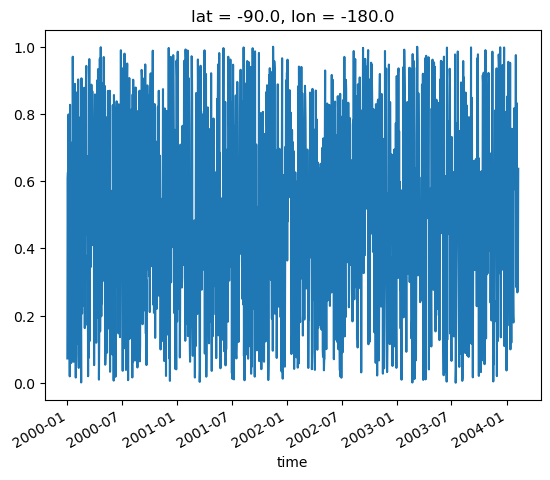

In [57]:
# Selecting and plotting single lat lon
# The isel here is for integer selection - selecting a single lat and lon with an integer
da_single_point.plot()

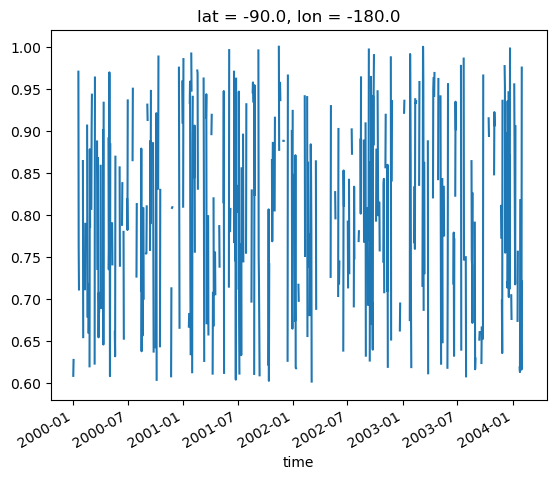

In [58]:
# we can get just where the data array is above a certain value using the 'where' function
da_greater_than = da_single_point.where(da_single_point > 0.6)
da_greater_than.plot()

In [59]:
# This still has the same number of time values as the dataset with all data. What this has done has 
# just replaced the values greater than 0.6 with nan (not a number value)
da_greater_than

<xarray.DataArray (time: 1500)>
nan 0.6083 0.6273 nan 0.7989 nan nan nan ... nan 0.8324 nan nan nan nan 0.6372
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2004-02-08
    lat      float64 -90.0
    lon      float64 -180.0

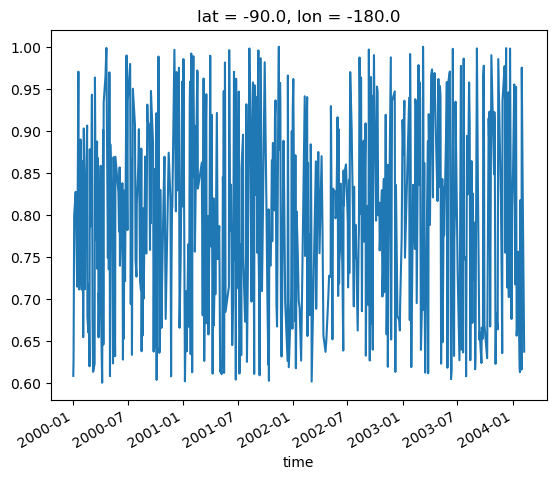

In [60]:
# If we wish to drop these we can use drop=True
# we can get just where the data array is above a certain value using the 'where' function
da_greater_than_no_nans = da_single_point.where(da_single_point > 0.6, drop=True)
da_greater_than_no_nans.plot()

In [61]:
# Summing, counting, mean, median are all done with methods (anything after the dot is called a method - they are just functions that 
# are attached to something)

da.mean(dim=['lat', 'lon'])
da.sum(dim=['lat', 'lon', 'time'])

<xarray.DataArray ()>
1.5e+07

In [62]:
# Percentile calculation
# If we are getting the percentiles across time, then we can use the reduce method.
da_percentile = da.reduce(np.nanpercentile, q=95, dim='time')
da_percentile

<xarray.DataArray (lat: 200, lon: 100)>
0.9479 0.9511 0.9525 0.9487 0.9393 0.9493 ... 0.9442 0.9478 0.9514 0.9479 0.9501
Coordinates:
  * lat      (lat) float64 -90.0 -89.1 -88.19 -87.29 ... 87.29 88.19 89.1 90.0
  * lon      (lon) float64 -180.0 -176.4 -172.7 -169.1 ... 172.7 176.4 180.0

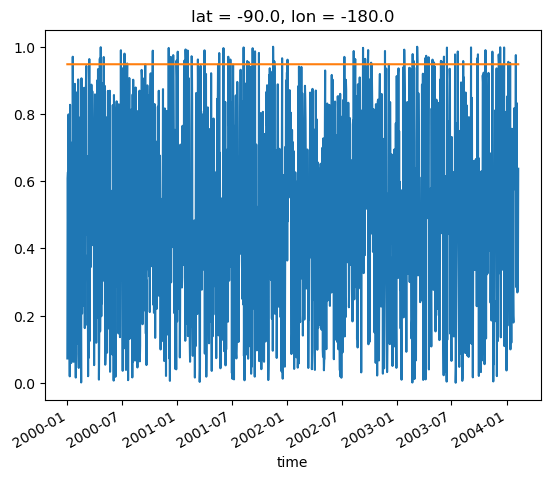

In [63]:
# Sanity check - this does look like only 5% of values are above the 95th percentile.
fig = plt.figure()
ax = fig.add_subplot()
da.isel(lat=0, lon=0).plot()
plt.plot(da.time.values, np.tile(da_percentile.isel(lat=0, lon=0).values, len(da.time.values)))

In [64]:
# we can then get the values above the 90th percentile using the where function (again this replaces with nans)
da.where(da>da_percentile)

<xarray.DataArray (time: 1500, lat: 200, lon: 100)>
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2004-02-08
  * lat      (lat) float64 -90.0 -89.1 -88.19 -87.29 ... 87.29 88.19 89.1 90.0
  * lon      (lon) float64 -180.0 -176.4 -172.7 -169.1 ... 172.7 176.4 180.0

In [65]:
# can use xr.where for 1 if true or 0 if not true
xr.where(da>da_percentile, 1, 0)

<xarray.DataArray (time: 1500, lat: 200, lon: 100)>
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2004-02-08
  * lat      (lat) float64 -90.0 -89.1 -88.19 -87.29 ... 87.29 88.19 89.1 90.0
  * lon      (lon) float64 -180.0 -176.4 -172.7 -169.1 ... 172.7 176.4 180.0